# Random Forest Performance Benchmarks

In [8]:
import numpy as np
import time

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Image
from sklearn.datasets import load_breast_cancer

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
from utils import iRF_benchmarks_lib
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/home/runjing_liu/Documents/iRF/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Load data

In [9]:
# load breast cancer data
#raw_data = load_breast_cancer()
#responses = raw_data.target
#features = raw_data.data

features = np.loadtxt('data/breast_cancer_features.csv', delimiter=',')
responses = np.loadtxt('data/breast_cancer_responses.csv', delimiter=',')

In [3]:
# load splicing data
# assumes Y_X_splicing.txt is in same folder as this notebook
data = np.loadtxt('Y_X_splicing.txt', skiprows = 1, usecols = range(1,307))
indices_high = data[:,-1] > 0.7
indices_low = data[:,-1] < 0.3

responses = np.zeros(np.shape(data)[0])
responses[indices_high] = 1

features = data[:, 0:270]

# keep data with high or low responses
responses = responses[np.logical_or(indices_high, indices_low)] 
features = features[np.logical_or(indices_high, indices_low), :] 


## Call function to compute benchmarks

In [3]:
n_trials = 10 # number of times to run random forest for our benchmarks
n_estimators = 20 # number of trees in the random forest
train_split_propn = 0.8

specs = {'n_trials': n_trials,
         'n_estimators': n_estimators,
         'train_split_propn': train_split_propn, 
         'N_obs': np.shape(features)[0], # use all data points
         'N_features': np.shape(features)[1] # use all features
        }

rf_bm = iRF_benchmarks_lib.consolidate_bm_RF(features, responses, specs, seed = 2017)

print(specs)



"""
n_trials = 10 # number of times to run random forest for our benchmarks
n_estimators = 500 # number of trees in the random forest
train_split_propn = 0.8

metrics_all, metrics_summary, feature_importances = \
            iRF_benchmarks_lib.RF_benchmarks(features, responses, 
                                    n_trials = n_trials,
                                    train_split_propn = train_split_propn, 
                                    n_estimators=n_estimators,
                                    seed = 2017)
"""


[10]
{'n_trials': [10], 'N_features': [30], 'N_obs': [569], 'train_split_propn': [0.8], 'n_estimators': [20]}
{'n_trials': [10], 'N_features': [30], 'N_obs': [569], 'train_split_propn': [0.8], 'n_estimators': [20]}


'\nn_trials = 10 # number of times to run random forest for our benchmarks\nn_estimators = 500 # number of trees in the random forest\ntrain_split_propn = 0.8\n\nmetrics_all, metrics_summary, feature_importances =             iRF_benchmarks_lib.RF_benchmarks(features, responses, \n                                    n_trials = n_trials,\n                                    train_split_propn = train_split_propn, \n                                    n_estimators=n_estimators,\n                                    seed = 2017)\n'

## Lets look at the results

### Relevant parameters

In [4]:
print('Dimensions of full dataset (#samples , # features): ', np.shape(features))
print('Number of training samples: ', np.round(np.shape(features)[0] * specs['train_split_propn'][0]))
print('Number of test samples: ', np.round(np.shape(features)[0]*(1-specs['train_split_propn'][0])))
print('number of trees in the random forest: ', specs['n_estimators'][0])

Dimensions of full dataset (#samples , # features):  (569, 30)
Number of training samples:  455.0
Number of test samples:  114.0
number of trees in the random forest:  20


### Timing and some accuracy scores across trials

In [5]:
print('time (seconds) to compute RF [mean, std]: ', rf_bm[0]['metrics_summary']['time'])
print('accuracy_score [mean, std]: ', rf_bm[0]['metrics_summary']['accuracy_score'])
print('hammming_loss [mean, std]: ', rf_bm[0]['metrics_summary']['hamming_loss'])

time (seconds) to compute RF [mean, std]:  [0.038280487060546875, 0.0068557931241411494]
accuracy_score [mean, std]:  [0.95964912280701764, 0.0070175438596491446]
hammming_loss [mean, std]:  [0.040350877192982457, 0.0070175438596491221]


### Lets look the stability of feature importances across trials

In [6]:
print('top five feature importances across trials')

for i in range(n_trials): 
    # sort by feature importance
    importances_rank = np.argsort(rf_bm[0]['feature_importances'][i])[::-1]
    print('trial' + str(i) + ': ', importances_rank[0:10])

top five feature importances across trials
trial0:  [23 22  7 27 20  2  0  6 21 10]
trial1:  [27 23 20 22  7  3 26  0 16 13]
trial2:  [20 27 23  3 26 22  7 12  6 21]
trial3:  [27  7 22 20 23 13  3 26  0 21]
trial4:  [27 20 22  6  2 25 13  3 21  5]
trial5:  [20 27 23  7 22 25  0 13 10  2]
trial6:  [27 22  2 23  3  7  6 26 13 25]
trial7:  [20  7 27 22  0 26 13  2 12 21]
trial8:  [27 23 20  7 22  0  3  6 25 24]
trial9:  [ 7 20 27 23 22  2  3 26 21 13]


## Lets look at how the RF benchmarks varies as a function of n_estimators

In [7]:
n_trials = 10 # number of times to run random forest for our benchmarks
n_estimators = [20, 50, 100, 150, 200, 300, 400, 500] # number of trees in the random forest
train_split_propn = 0.8

specs = {'n_trials': n_trials,
         'n_estimators': n_estimators,
         'train_split_propn': train_split_propn, 
         'N_obs': np.shape(features)[0], # use all data points
         'N_features': np.shape(features)[1] # use all features
        }

rf_bm = iRF_benchmarks_lib.consolidate_bm_RF(features, responses, specs, seed = 2017)


n_estimators
[20, 50, 100, 150, 200, 300, 400, 500]
{'n_trials': [10, 10, 10, 10, 10, 10, 10, 10], 'N_features': [30, 30, 30, 30, 30, 30, 30, 30], 'N_obs': [569, 569, 569, 569, 569, 569, 569, 569], 'train_split_propn': [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], 'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500]}


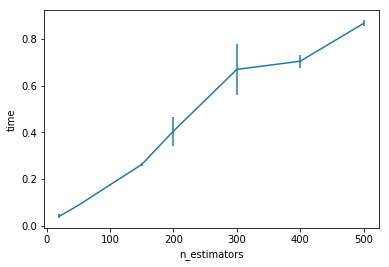

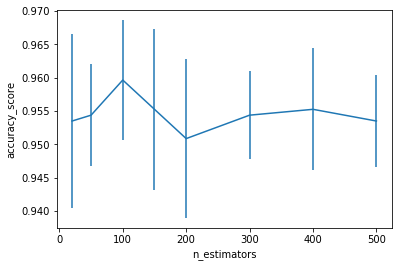

In [10]:
iRF_benchmarks_lib.plot_bm_RF(rf_bm, specs, 'n_estimators', 'time')
iRF_benchmarks_lib.plot_bm_RF(rf_bm, specs, 'n_estimators', 'accuracy_score')

## iRF benchmarks

### Call function to compute iRF benchmarks

In [7]:
n_trials = 2

train_split_propn = 0.8
n_estimators = 20
n_bootstraps = 20
n_RIT = 20
max_depth = 5
n_estimators_bootstrap = 5

iRF_specs = {'n_trials': n_trials, 
            'n_iter': n_estimators, 
            'train_split_propn': train_split_propn, 
            'n_estimators': n_estimators, 
            'n_bootstraps': n_bootstraps, 
            'propn_n_samples': 0.2, 
            'bin_class_type': 1, 
            'n_RIT': n_RIT,
            'max_depth': max_depth, 
            'noisy_split': False, 
            'num_splits': 2, 
            'n_estimators_bootstrap': n_estimators_bootstrap, 
            'N_obs': np.shape(features)[0], # use all data points
            'N_features': np.shape(features)[1] # use all features
}



In [ ]:
iRF_bm = iRF_benchmarks_lib.consolidate_bm_iRF(features, responses, iRF_specs, seed = None)

[2]
{'N_features': [30], 'n_RIT': [20], 'n_trials': [2], 'n_iter': [20], 'train_split_propn': [0.8], 'bin_class_type': [1], 'n_bootstraps': [20], 'propn_n_samples': [0.2], 'max_depth': [5], 'noisy_split': [False], 'N_obs': [569], 'num_splits': [2], 'n_estimators': [20], 'n_estimators_bootstrap': [5]}


## Lets look at the results

### Relevant parameters

In [5]:
print('Dimensions of full dataset (#samples , # features): ', np.shape(features))
print('Number of training samples: ', np.round(np.shape(features)[0] * train_split_propn))
print('Number of test samples: ', np.round(np.shape(features)[0]*(1-train_split_propn)))

print('\n')

print('number of trees in full random forest: ', n_estimators)
print('number of bootstrap samples: ', n_bootstraps)
print('number of trees in RIT: ', n_RIT)
print('max depth of RIT: ', max_depth)
print('number of trees is RF bootstrap: ', n_estimators_bootstrap)


Dimensions of full dataset (#samples , # features):  (569, 30)
Number of training samples:  455.0
Number of test samples:  114.0


number of trees in full random forest:  20
number of bootstrap samples:  20
number of trees in RIT:  20
max depth of RIT:  5
number of trees is RF bootstrap:  5


### Timing and some accuracy scores across trials
These are metrics on the random forest at iteration K

In [6]:
print('time (seconds) to compute iRF [mean, std]: ', iRF_bm[0]['metrics_summary']['time'])
print('\n')
print('accuracy_score [mean, std]: ', iRF_bm[0]['metrics_summary']['accuracy_score'])
print('hammming_loss [mean, std]: ', iRF_bm[0]['metrics_summary']['hamming_loss'])

time (seconds) to compute iRF [mean, std]:  [4.5889672438303633, 0.20403090285112635]


accuracy_score [mean, std]:  [0.95906432748538017, 0.01490941378243504]
hammming_loss [mean, std]:  [0.040935672514619881, 0.014909413782435042]


### Lets look the stability of feature importances across trials

Again, feature importances are measured for the last forest

In [7]:
print('top five important features across trials')

for i in range(n_trials): 
    importances_rank = np.argsort(iRF_bm[0]['feature_importances'][i])[::-1]
    print('trial' + str(i) + ': ', importances_rank[0:5])

top five important features across trials
trial0:  [22 27  7 20 23]
trial1:  [27 22 23  7 21]
trial2:  [22 27  7 20 21]


### Finally, lets examine the discovered interactions across trials 

In [8]:
print('top five stable interactions across trials')

for i in range(n_trials): 
    
    # sort by stability
    stability = sorted(iRF_bm[0]['stability_all'][i].values(), reverse=True)
    interactions = sorted(iRF_bm[0]['stability_all'][i], key=iRF_bm[0]['stability_all'][i].get, reverse=True)

    print('trial' + str(i) + ': ', interactions[0:5])

top five stable interactions across trials
trial0:  ['7', '22', '22_27', '27', '20_27']
trial1:  ['27', '22', '23', '22_27', '7']
trial2:  ['7', '22', '22_27', '7_20', '27']


## Lets look at how the RF benchmarks varies as a function of n_estimators

In [ ]:
n_trials = 3

train_split_propn = 0.8
n_estimators = [20, 50, 100]
n_bootstraps = 20
n_RIT = 20
max_depth = 5
n_estimators_bootstrap = 5

iRF_specs = {'n_trials': n_trials, 
            'n_iter': 5, 
            'train_split_propn': train_split_propn, 
            'n_estimators': n_estimators, 
            'n_bootstraps': n_bootstraps, 
            'propn_n_samples': 0.2, 
            'bin_class_type': 1, 
            'n_RIT': n_RIT,
            'max_depth': max_depth, 
            'noisy_split': False, 
            'num_splits': 2, 
            'n_estimators_bootstrap': n_estimators_bootstrap, 
            'N_obs': np.shape(features)[0], # use all data points
            'N_features': np.shape(features)[1] # use all features
}

iRF_bm = iRF_benchmarks_lib.consolidate_bm_iRF(features, responses, iRF_specs, seed = 2018)



n_estimators
[20, 50, 100]
{'n_bootstraps': [20, 20, 20], 'N_features': [30, 30, 30], 'n_RIT': [20, 20, 20], 'noisy_split': [False, False, False], 'n_trials': [3, 3, 3], 'n_estimators': [20, 50, 100], 'n_estimators_bootstrap': [5, 5, 5], 'num_splits': [2, 2, 2], 'propn_n_samples': [0.2, 0.2, 0.2], 'max_depth': [5, 5, 5], 'train_split_propn': [0.8, 0.8, 0.8], 'N_obs': [569, 569, 569], 'bin_class_type': [1, 1, 1], 'n_iter': [5, 5, 5]}


In [ ]:
plot_bm(iRF_bm, specs, 'n_estimators', 'time')